# Notebook to make drawing with pure position control
We will use two models
1. Robotics toolbox kinematic model to plan the trajectory (Position)
2. Mujoco model to simulate the dynamics

# Requirements
```pip install roboticstoolbox-python```

```pip install spatialmath-python```

scipy need to be downgraded, there is a problem with the most updated version and the robotics toolbox
```pip show scipy``` to show current version

```pip install scipy==1.11.0```



In [1]:
# Imports libraries 
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import os
import mediapy as media
import tqdm
import mujoco_viewer

# Robotics toolbox and dependencies
import roboticstoolbox as rtb
import spatialmath as sm
from spatialmath import UnitQuaternion
from spatialmath.base import q2r, r2x, rotx, roty, rotz
from mujoco_parser import MuJoCoParserClass

# Import local libraries
from Ur5e import Ur5e
from actuator import *

In [2]:
xml_path = 'universal_robots_ur5e/scene.xml'
env = MuJoCoParserClass(name='ur5e',rel_xml_path=xml_path,VERBOSE=False)


In [3]:
"""
# Load font that has points for letters
font = rtb.rtb_load_jsonfile("data/hershey.json")

# Get letter from font
letter = font["E"]

# Get the via points for the letter
lift = 0.1; # height to raise the pen
scale = 0.05
via = np.empty((0, 3))
for stroke in letter["strokes"]:
  xyz = np.array(stroke) * scale # convert stroke to nx2 array
  xyz = np.pad(xyz, ((0, 0), (0, 1))) # add third column, z=0
  xyz[:,-1] = -0.01 
  via = np.vstack((via, xyz))  # append rows to via points
  via = np.vstack((via, np.hstack([xyz[-1,:2], lift]))) # lift pen

# Create trajectory from via points
xyz_traj = rtb.mstraj(via, qdmax=[0.5, 0.5, 0.5], q0=[0, 0, lift], 
                  dt=0.002, tacc=0.2).q

# Print stats on the trajectory
print("Number of via points: ", len(xyz_traj))
print("Duration of trajectory: ", len(xyz_traj)*0.002, " seconds")

# Visualize trajectory
fig = plt.figure(); ax = fig.add_subplot(111, projection="3d")
plt.plot(xyz_traj[:,0], xyz_traj[:,1], xyz_traj[:,2])

"""

'\n# Load font that has points for letters\nfont = rtb.rtb_load_jsonfile("data/hershey.json")\n\n# Get letter from font\nletter = font["E"]\n\n# Get the via points for the letter\nlift = 0.1; # height to raise the pen\nscale = 0.05\nvia = np.empty((0, 3))\nfor stroke in letter["strokes"]:\n  xyz = np.array(stroke) * scale # convert stroke to nx2 array\n  xyz = np.pad(xyz, ((0, 0), (0, 1))) # add third column, z=0\n  xyz[:,-1] = -0.01 \n  via = np.vstack((via, xyz))  # append rows to via points\n  via = np.vstack((via, np.hstack([xyz[-1,:2], lift]))) # lift pen\n\n# Create trajectory from via points\nxyz_traj = rtb.mstraj(via, qdmax=[0.5, 0.5, 0.5], q0=[0, 0, lift], \n                  dt=0.002, tacc=0.2).q\n\n# Print stats on the trajectory\nprint("Number of via points: ", len(xyz_traj))\nprint("Duration of trajectory: ", len(xyz_traj)*0.002, " seconds")\n\n# Visualize trajectory\nfig = plt.figure(); ax = fig.add_subplot(111, projection="3d")\nplt.plot(xyz_traj[:,0], xyz_traj[:,1], xyz

/home/mikk8301/.local/lib/python3.10/site-packages/roboticstoolbox/tools/trajectory.py:550: RuntimeWarning: invalid value encountered in divide
  ts = t.flatten() / tscal


Number of via points:  11195
Duration of trajectory:  22.39  seconds


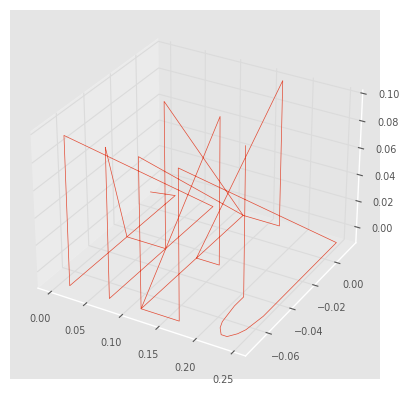

In [4]:

import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt

# Load font that has points for letters
font = rtb.rtb_load_jsonfile("data/hershey.json")

# Define the string I want to draw
text = "HEJ"

# Define parameters
lift = 0.1  # height to raise the pen
scale = 0.1
x_offset = 0  # Initial x-offset

# Initialize empty array to store via points
via = np.empty((0, 3))

# Loop through each character in the string
for char in text:
    # Get letter from font
    letter = font[char]

    # Loop through each stroke in the letter
    for stroke in letter["strokes"]:
        xyz = np.array(stroke) * scale          # Convert stroke to nx2 array and scale
        xyz = np.pad(xyz, ((0, 0), (0, 1)))     # Add third column, z=0
        xyz[:, -1] = -0.01                       # Set z-coordinate to pen down position
        xyz[:, 0] += x_offset                   # Add x-offset
        via = np.vstack((via, xyz))             # Append stroke points to via points
        via = np.vstack((via, np.hstack([xyz[-1, :2], lift])))  # Lift the pen to z=0.1


    # Increase x-offset for next letter
    x_offset += scale * 1  # Adjust the spacing between letters

# Create trajectory from via points
#xyz_traj = rtb.mstraj(via, qdmax=[0.5, 0.5, 0.5], q0=[0, 0, 0], 
#                      dt=0.002, tacc=0.2).q


xyz_traj = rtb.mstraj(via, qdmax=[0.1, 0.1, 0.1], q0=[0, 0, 0], 
                      dt=0.002, tacc=0).q
# Print stats on the trajectory
print("Number of via points: ", len(xyz_traj))
print("Duration of trajectory: ", len(xyz_traj)*0.002, " seconds")

# Visualize trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plt.plot(xyz_traj[:, 0], xyz_traj[:, 1], xyz_traj[:, 2])
plt.show()



In [5]:
# Make ur5e instance
try:
    ur5e
except NameError:
    ur5e = Ur5e()

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
rd: [0.4 1.  1.  1.2 1. ]
al [-0.2  1.   1.   1.4  1. ]
new_al [-0.2  1.   0.   1.   1.4  1. ]
Robot pose:    -1         6.795e-09  1.948e-07  0.4869    
   6.795e-09  1         9.502e-09 -0.1385    
  -1.948e-07  9.502e-09 -1         0.417     
   0         0         0         1         

Start pose of the pen trajectory:    -1         0         0         0.4902    
   0         1         0        -0.1328    
   0         0        -1         0.3069    
   0         0         0         1         



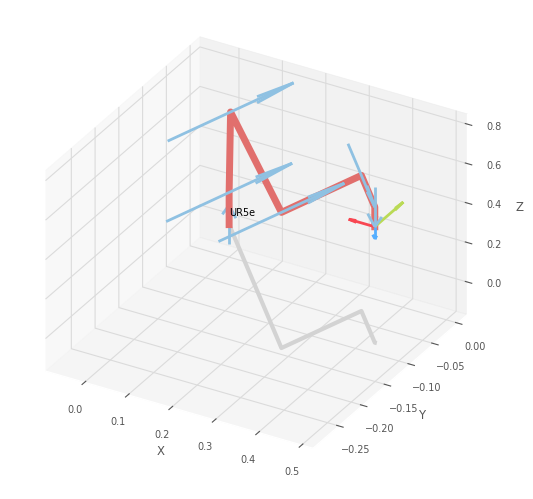

PyPlot3D backend, t = 0.05, scene:
  UR5e

<Figure size 640x480 with 0 Axes>

In [6]:
# Translate the trajectory with respect to the robot's base frame
T_pen = sm.SE3.Trans(0.49, -0.133, 0.307) * sm.SE3.Trans(xyz_traj) * sm.SE3.OA( [0, 1, 0], [0, 0, -1]);



S_v = np.diag([1.0, 1.0, 1.0, 1.0, 1.0]) 
zero_row = np.zeros((1,5))
S_v = np.insert(S_v, 2, zero_row,axis=0)
S_v_transposed = np.linalg.pinv(S_v)
print(S_v)
print(S_v_transposed)

#----------------------
pd = [0.4, 1, 0.2, 1, 1.2, 1]
dpd = [1, 1, 1, 1, 1, 1]
ddpd = [1, 1, 1, 1, 1, 1]

rd = S_v_transposed @ pd
print("rd:",rd)
drd = S_v_transposed @ dpd
ddrd = S_v_transposed @ ddpd
#----------------------

#to make it critically damped we use *2*np.sqrt(K_Pr[1,1]):
K_Pr = np.diag([2.0, 2.0, 2.0, 2.0, 2.0])
K_Dr = np.diag([2.0, 2.0, 2.0, 2.0, 2.0])*2*np.sqrt(K_Pr[1,1])

#DEM HAR VI IKKE ENDNU.
v = [1, 1, 1, 1, 1]
r = np.transpose([1, 1, 1, 1, 1])

alpha_v = ddrd + K_Dr@(drd-v)+K_Pr@(rd-r) #joint accelerations.

print("al",alpha_v)

new_alpha_v = S_v @ alpha_v
print("new_al",new_alpha_v)

# Get the robot in a ready position, so that the inverse kinematics can be solved
q0 = ur5e.q_traj0
T0 = ur5e.robot.fkine(q0)

# Print robot pose and start pose of the pen trajectory
print("Robot pose: ", T0)
print("Start pose of the pen trajectory: ", T_pen[0])

# visualize the robot pose
ur5e.robot.plot(q0)

In [7]:
# Use the inverse kinematics to make a trajectory for the robot
sol = ur5e.invkin(T_pen, q0)

In [8]:
print(len(sol.q))

11195


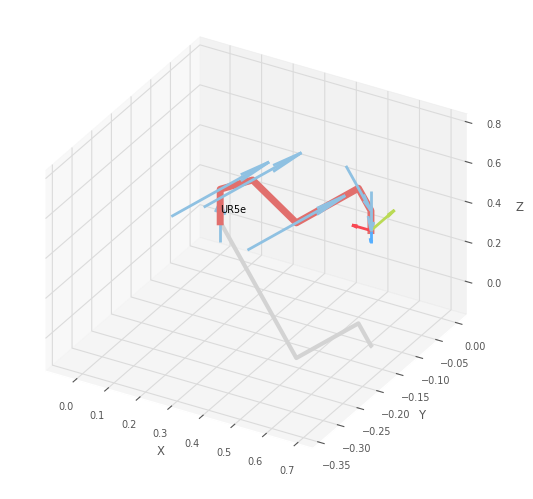

PyPlot3D backend, t = 0.05, scene:
  UR5e

<Figure size 640x480 with 0 Axes>

In [9]:
ur5e.robot.plot(sol.q[-1], block=False)

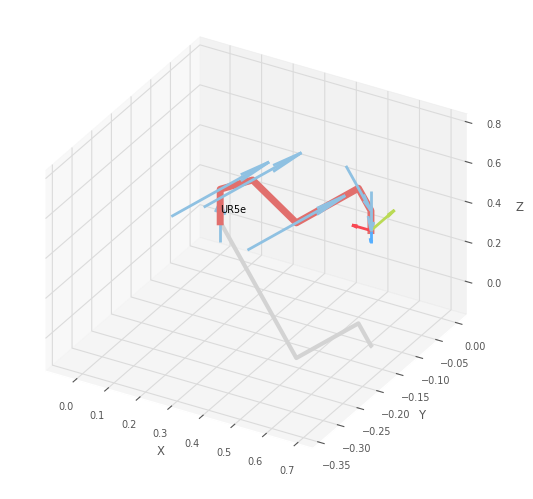

PyPlot3D backend, t = 0.05, scene:
  UR5e

<Figure size 640x480 with 0 Axes>

In [10]:
ur5e.robot.plot(sol.q[-1], block=False)

""

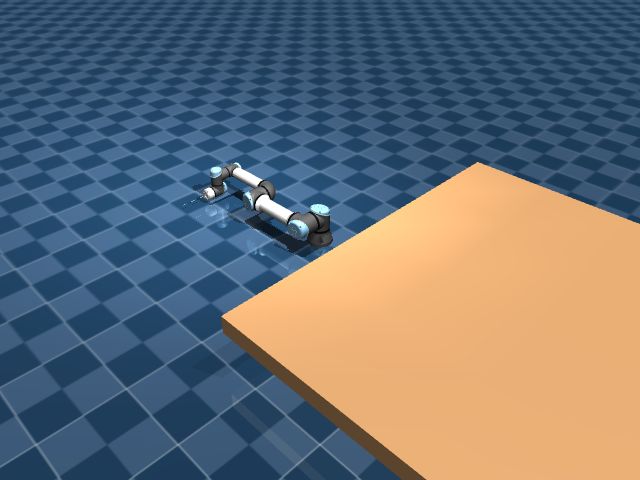

In [11]:
# Visualize mujoco, Show initial state of the scene

# Use forward dynamics to get the initial state of the data
mujoco.mj_forward(ur5e.m, ur5e.d)
# render the initial state
try:
    renderer
except NameError:
    renderer = mujoco.Renderer(ur5e.m, 480, 640)



renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
media.show_image(renderer.render())

""

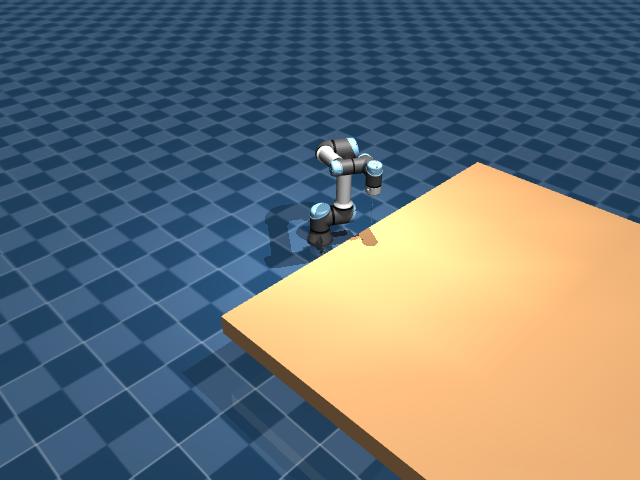

In [12]:
# Update the joints to the initial state of the trajectory
ur5e.d.qpos[0:6] = sol.q[0]
ur5e.d.qpos[0:6] = ur5e.q_traj0

# Visualize mujoco, Show initial state of the scene
mujoco.mj_forward(ur5e.m, ur5e.d)

renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
media.show_image(renderer.render())

In [13]:
# Show the video in 1:1 with real time, position control to joints zero positions

# Iterate the control though the dynamics of the simulation
FRAMERATE = 30
frames = []

# Reset the data to the initial state, this is necessary to run the cell multiple times
mujoco.mj_resetDataKeyframe(ur5e.m, ur5e.d, 0)
# Update the joints to the initial state of the trajectory
ur5e.d.qpos[0:6] = sol.q[0]
mujoco.mj_forward(ur5e.m, ur5e.d)
for step in range(len(sol.q)):            
    # Update control target for position control
    ur5e.d.ctrl[0:6] = np.array([0, 0, 0, 0, 0, 0])
    # Take a step in simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    # Visualize and save to video, render only 30 frames per second in simulation
    if len(frames) < ur5e.d.time * FRAMERATE:
        renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
        frames.append(renderer.render())
# Show video
media.show_video(frames, fps=30) 

In [15]:
# Show the video in 1:1 with real time, position control to the trajectory
"""
FRAMERATE = 30
frames = []

mujoco.mj_resetDataKeyframe(ur5e.m, ur5e.d, 0)
ur5e.d.qpos[0:6] = sol.q[0]
mujoco.mj_forward(ur5e.m, ur5e.d)

for step in range(len(sol.q)):
    ur5e.d.ctrl[0:6] = sol.q[step]
    mujoco.mj_step(ur5e.m, ur5e.d)

    p_contacts,f_contacts,geom1s,geom2s = ur5e.get_contact_info()

    #for (p_contact,f_contact,geom1,geom2) in zip(p_contacts,f_contacts,geom1s,geom2s):
    #    print(p_contact)
    #    print(f_contact)
    # Render contact informations
   
        
    
    if len(frames) < ur5e.d.time * FRAMERATE:
        renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
        frames.append(renderer.render())

media.show_video(frames, fps=30) 
"""

'\nFRAMERATE = 30\nframes = []\n\nmujoco.mj_resetDataKeyframe(ur5e.m, ur5e.d, 0)\nur5e.d.qpos[0:6] = sol.q[0]\nmujoco.mj_forward(ur5e.m, ur5e.d)\n\nfor step in range(len(sol.q)):\n    ur5e.d.ctrl[0:6] = sol.q[step]\n    mujoco.mj_step(ur5e.m, ur5e.d)\n\n    p_contacts,f_contacts,geom1s,geom2s = ur5e.get_contact_info()\n\n    #for (p_contact,f_contact,geom1,geom2) in zip(p_contacts,f_contacts,geom1s,geom2s):\n    #    print(p_contact)\n    #    print(f_contact)\n    # Render contact informations\n   \n        \n    \n    if len(frames) < ur5e.d.time * FRAMERATE:\n        renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())\n        frames.append(renderer.render())\n\nmedia.show_video(frames, fps=30) \n'

In [16]:
import matplotlib.pyplot as plt

# Initialize lists to store contact points and forces
contact_points = []
contact_forces = []

mujoco.mj_resetDataKeyframe(ur5e.m, ur5e.d, 0)
ur5e.d.qpos[0:6] = sol.q[0]
mujoco.mj_forward(ur5e.m, ur5e.d)

for step in range(len(sol.q)):
    ur5e.d.ctrl[0:6] = sol.q[step]
    mujoco.mj_step(ur5e.m, ur5e.d)

    p_contacts,f_contacts,geom1s,geom2s = ur5e.get_contact_info()


    for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
        
        contact_points.append(list(p_contact))    

        contact_forces.append(list(f_contact))
        
# Plotting contact points and forces
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(contact_points)
plt.title('Contact Points')
plt.xlabel('Time')
plt.ylabel('Contact Point Position')


plt.subplot(2, 1, 2)
plt.plot(contact_forces)
plt.title('Contact Forces')
plt.xlabel('Time')
plt.ylabel('Contact Force')
plt.show()


ValueError: too many values to unpack (expected 4)

/tmp/ipykernel_27866/3157003949.py:58: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(sc, ax=ax2, pad=0.05, aspect=40)


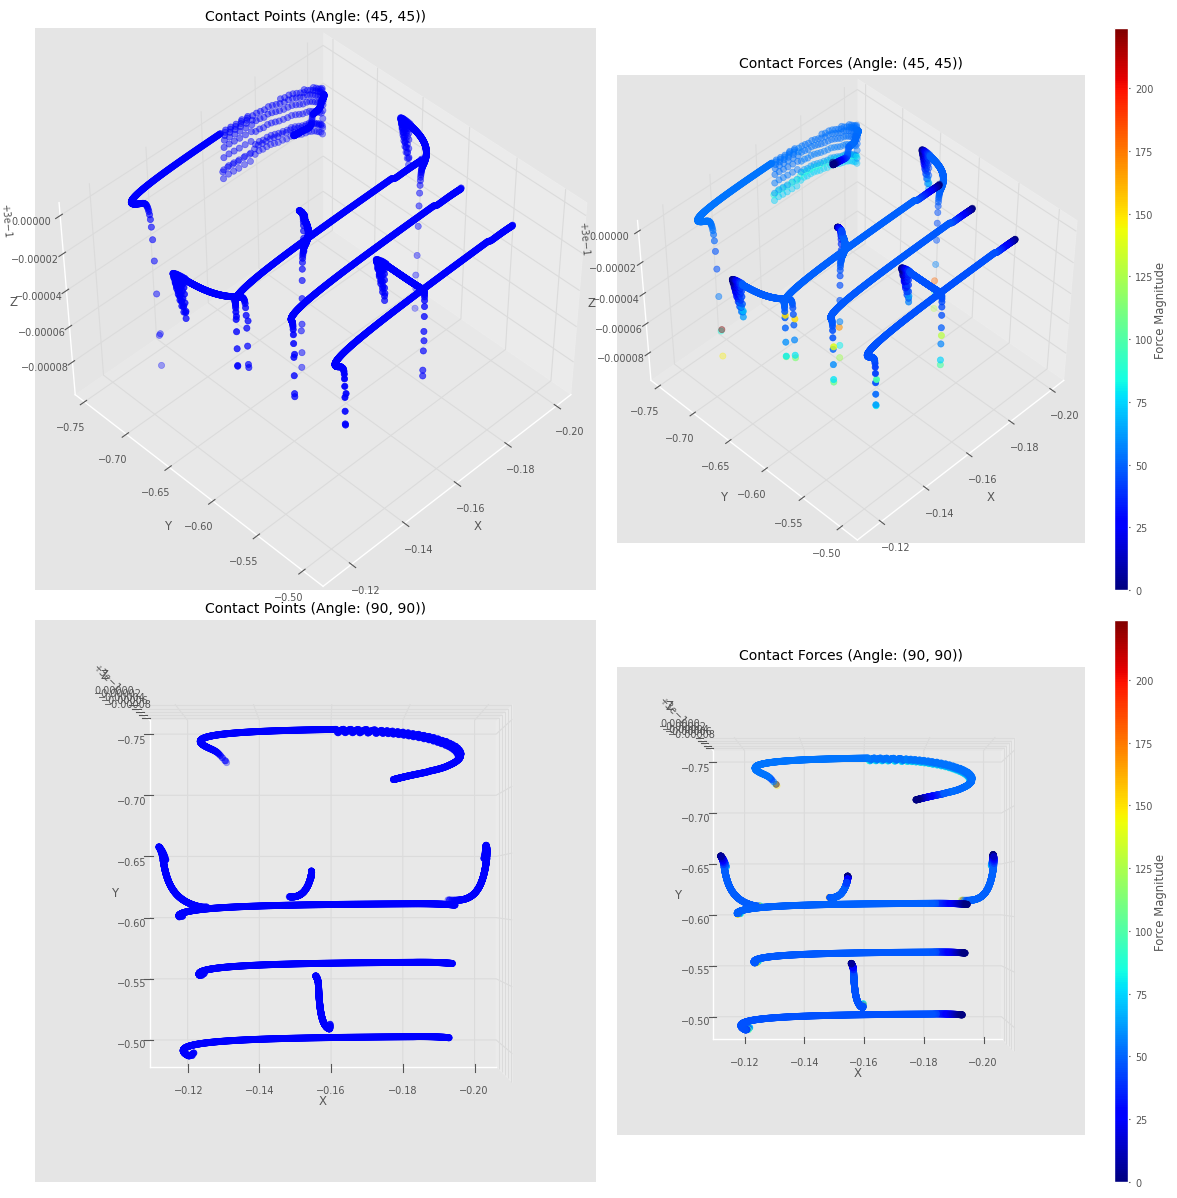

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize lists to store contact points and forces
contact_points = []
contact_forces = []

mujoco.mj_resetDataKeyframe(ur5e.m, ur5e.d, 0)
ur5e.d.qpos[0:6] = sol.q[0]
mujoco.mj_forward(ur5e.m, ur5e.d)

for step in range(len(sol.q)):
    ur5e.d.ctrl[0:6] = sol.q[step]
    mujoco.mj_step(ur5e.m, ur5e.d)

    p_contacts, f_contacts, geom1s, geom2s, p_distance= ur5e.get_contact_info()

    for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
        contact_points.append(list(p_contact))
        contact_forces.append(list(f_contact))


# Unpack individual components of contact points and forces
x_contact, y_contact, z_contact = zip(*contact_points)

# Find the magnitude of forces
force_magnitude = np.linalg.norm(contact_forces, axis=1)
max_magnitude = max(force_magnitude)

# Create a list of different viewing angles
angles = [(45, 45), (90, 90)]

# Plot contact points and forces from different angles
fig, axs = plt.subplots(len(angles), 2, figsize=(12, len(angles) * 6), subplot_kw={'projection': '3d'})

for i, angle in enumerate(angles):
    ax1 = axs[i, 0]
    ax2 = axs[i, 1]

    # Plot contact points
    ax1.scatter(x_contact, y_contact, z_contact, c='b', marker='o')
    ax1.set_title(f'Contact Points (Angle: {angle})')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.view_init(elev=angle[0], azim=angle[1])

    # Plot contact forces with colors
    sc = ax2.scatter(x_contact, y_contact, z_contact, c=force_magnitude, cmap='jet')
    ax2.set_title(f'Contact Forces (Angle: {angle})')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.view_init(elev=angle[0], azim=angle[1])

    # Add color bar for force magnitude
    cbar = fig.colorbar(sc, ax=ax2, pad=0.05, aspect=40)
    cbar.set_label('Force Magnitude')

plt.tight_layout()
plt.show(block=True)  # Set block=True to allow for zooming and rotating


In [18]:
# Test if we can run the mucojo interactive simulation
#with mujoco.viewer.launch_passive(ur5e.m, ur5e.d) as viewer:
#    while True:
        # Get contact information
#        mujoco.mj_step(ur5e.m, ur5e.d)
#        viewer.sync()